In [2]:
import numpy as np
import pandas as pd
import os
import yaml
import datetime

In [3]:
ENV_FILE='../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

#initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE= os.path.join(ROOT_DIR, params['directories']['processed'], params['files']['all_data'])

#Lecture du fihcier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
               .assign(day=lambda _df:_df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020,3,21)]
              )

In [4]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


In [5]:
france_df = (epidemie_df[epidemie_df['Country/Region']=='France']
             .groupby(['Country/Region','day'])
             .agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
             .reset_index()
            )

france_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,France,2020-01-24,2.0,0.0,0.0
1,France,2020-01-25,3.0,0.0,0.0
2,France,2020-01-26,3.0,0.0,0.0
3,France,2020-01-27,3.0,0.0,0.0
4,France,2020-01-28,4.0,0.0,0.0


In [6]:
france_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
31,France,2020-03-17,7674.0,148.0,12.0
32,France,2020-03-18,9046.0,148.0,12.0
33,France,2020-03-19,10883.0,243.0,12.0
34,France,2020-03-20,12623.0,450.0,12.0
35,France,2020-03-21,14301.0,562.0,12.0


In [7]:
france_df['Confirmed'].diff()

0        NaN
1        1.0
2        0.0
3        0.0
4        1.0
5        1.0
6        0.0
7        0.0
8        1.0
9        5.0
10       0.0
11       1.0
12       2.0
13       4.0
14      20.0
15      19.0
16      43.0
17      30.0
18      61.0
19      13.0
20      81.0
21      92.0
22     276.0
23     296.0
24     177.0
25      83.0
26     575.0
27     503.0
28    2194.0
29      28.0
30    2136.0
31    1029.0
32    1372.0
33    1837.0
34    1740.0
35    1678.0
Name: Confirmed, dtype: float64

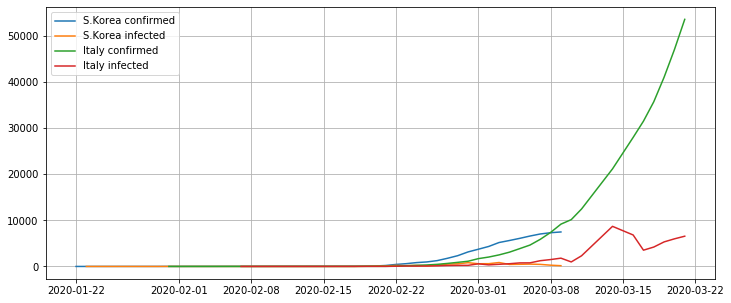

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,5))
plt.plot(korea_df['day'], korea_df['Confirmed'], label = 'S.Korea confirmed')
plt.plot(korea_df['day'], korea_df['infected'], label = 'S.Korea infected')
plt.plot(italy_df['day'], italy_df['Confirmed'], label = 'Italy confirmed') #italy_df plus bas
plt.plot(italy_df['day'], italy_df['infected'], label = 'Italy infected')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
def get_country(self, country):
    return (epidemie_df[epidemie_df['Country/Region'] == country]
            .groupby(['Country/Region','day'])
            .agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
            .reset_index()
           )

#Monkey Patch pd.DataFrame
pd.DataFrame.get_country= get_country

In [10]:
get_country(epidemie_df, 'South Korea').head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [11]:
epidemie_df.get_country("South Korea").head()


,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [12]:
italy_df = epidemie_df.get_country('Italy')
italy_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,Italy,2020-01-31,2.0,0.0,0.0
1,Italy,2020-02-07,3.0,0.0,0.0
2,Italy,2020-02-21,20.0,1.0,0.0
3,Italy,2020-02-22,62.0,2.0,1.0
4,Italy,2020-02-23,155.0,3.0,2.0


In [13]:
korea_df = (epidemie_df[epidemie_df['Country/Region']=='South Korea']
             .groupby(['Country/Region','day'])
             .agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
             .reset_index()
            )

korea_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
38,South Korea,2020-03-05,6088.0,35.0,41.0
39,South Korea,2020-03-06,6593.0,42.0,135.0
40,South Korea,2020-03-07,7041.0,44.0,135.0
41,South Korea,2020-03-08,7314.0,50.0,118.0
42,South Korea,2020-03-09,7478.0,53.0,118.0


In [29]:
korea_df['Recovered'].sum()

934.0

In [17]:
korea_df['infected']=korea_df['Confirmed'].diff()
italy_df['infected']=italy_df['Confirmed'].diff()

In [20]:
korea_df['infected']

0       NaN
1       0.0
2       1.0
3       0.0
4       1.0
5       1.0
6       0.0
7       0.0
8       0.0
9       7.0
10      1.0
11      3.0
12      1.0
13      3.0
14      4.0
15      1.0
16      1.0
17      2.0
18      1.0
19      0.0
20      0.0
21      1.0
22      1.0
23      1.0
24     73.0
25    100.0
26    229.0
27    169.0
28    231.0
29    144.0
30    284.0
31    505.0
32    571.0
33    813.0
34    586.0
35    599.0
36    851.0
37    435.0
38    467.0
39    505.0
40    448.0
41    273.0
42    164.0
Name: infected, dtype: float64

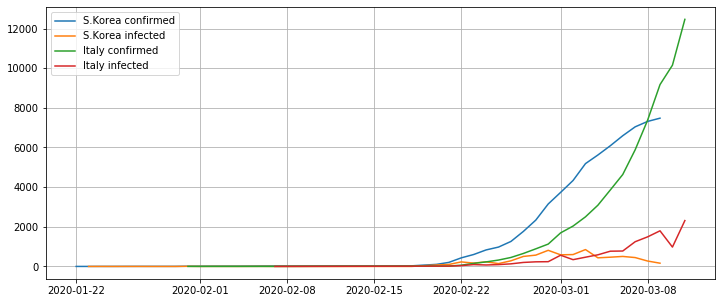

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,5))
plt.plot(korea_df['day'], korea_df['Confirmed'], label = 'S.Korea confirmed')
plt.plot(korea_df['day'], korea_df['infected'], label = 'S.Korea infected')
plt.plot(italy_df['day'], italy_df['Confirmed'], label = 'Italy confirmed') #italy_df plus bas
plt.plot(italy_df['day'], italy_df['infected'], label = 'Italy infected')
plt.grid(True)
plt.legend()
plt.show()

In [40]:
beta,gamma = [0.01,0.1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

In [41]:
korea_df.loc[2:].head()

,Country/Region,day,Confirmed,Deaths,Recovered,infected
2,South Korea,2020-01-24,2.0,0.0,0.0,1.0
3,South Korea,2020-01-25,2.0,0.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0,1.0
5,South Korea,2020-01-27,4.0,0.0,0.0,1.0
6,South Korea,2020-01-28,4.0,0.0,0.0,0.0


In [42]:
from scipy.integrate import solve_ivp

beta,gamma = [0.01,0.1]
solution_korea = solve_ivp(SIR, [0, 40], [51_470_000, 1, 0], t_eval=np.arange(0, 40, 1))

In [43]:
solution_korea


  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 11406320
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 t_events: None
        y: array([[ 5.14700000e+07,  8.12315949e-07,  1.58795501e-06,
        -6.11496054e-07,  1.36615061e-06, -3.22556764e-07,
        -1.93104221e-07,  7.71965291e-07, -1.68864907e-07,
         1.06585412e-06, -6.11197660e-07,  1.44060939e-06,
        -1.12329009e-06,  7.22805066e-07, -1.17917756e-06,
         7.52961001e-07,  1.37573581e-06,  4.88191093e-07,
        -3.28007828e-07,  5.31566053e-07, -7.40348178e-08,
         4.93680791e-07,  6.02739684e-07, -2.47002082e-07,
         8.31007760e-07, -3.08101699e-07, -5.18619282e-07,
         3.68423388e-07,  3.03307357e-07, -5.40378765e-07,
        -1.168838

In [44]:
def plot_epidemie(solution, infected, susceptible=False):
    fig = plt.figure(figsize=(12, 5))
    if susceptible:
        plt.plot(solution.t, solution.y[0])
    plt.plot(solution.t, solution.y[1])
    plt.plot(solution.t, solution.y[2])
    plt.plot(infected.reset_index(drop=True).index, infected, "k*:")
    plt.grid("True")
    if susceptible:
        plt.legend(["Susceptible", "Infected", "Recovered", "Original Data"])
    else:
        plt.legend(["Infected", "Recovered", "Original Data"])
    plt.show()

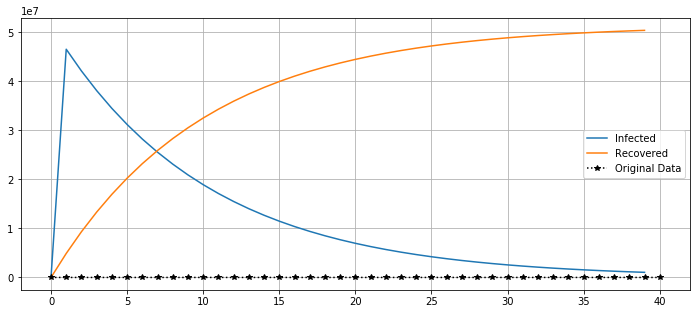

In [45]:
plot_epidemie(solution_korea, korea_df.loc[2:]['infected'])

In [26]:
korea_df['infected'].max()

851.0

In [27]:
korea_df['infected'].diff().max()

252.0

In [46]:
(korea_df['Recovered'].diff().loc[korea_df['infected'] != 0] / korea_df.loc[korea_df['infected'] != 0]['infected']).mean()

0.17870945831971552

In [47]:
beta,gamma = [0.001,0.1]
solution_korea = solve_ivp(SIR, [0, 40], [51_470_000, 1, 0], t_eval=np.arange(0, 41, 1))

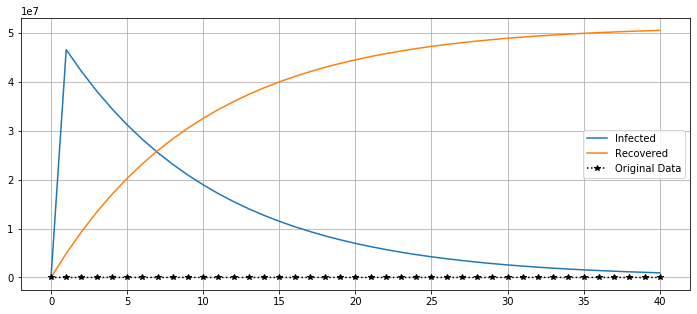

In [48]:
plot_epidemie(solution_korea, korea_df.loc[2:]['infected'])

In [31]:
solution_korea.y[1][::5]

array([1.00000000e+00, 7.95337875e+00, 6.32150334e+01, 5.02900700e+02,
       3.99302069e+03, 3.17474769e+04, 2.50655705e+05, 1.89396245e+06,
       1.07484823e+07])

In [49]:
def sumsq_error(parameters):
    beta, gamma = parameters
    
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

    solution = solve_ivp(SIR, [0, nb_steps-1], [total_population, 1, 0], t_eval=np.arange(0, nb_steps, 1))
    
    return(sum((solution.y[1]-infected_population)**2))

In [50]:
total_population = 51_470_000

infected_population = korea_df.loc[2:]['infected']
nb_steps=len(infected_population)

In [51]:
len(infected_population)

41

In [52]:
%%time
from scipy.optimize import minimize 

msol = minimize(sumsq_error, [0.001, 0.1], method='Nelder-Mead')
msol.x

Wall time: 26min 15s


array([ 0.1499158 , 81.01959328])

In [53]:
beta_optimal = 0.1499158
gamma_optimal = 81.01959328

In [54]:
beta = beta_optimal
gamma = gamma_optimal

def SIR(t, y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

solution_korea_optimal = solve_ivp(SIR, [0, 40], [51_470_000*0.1, 1, 0], t_eval=np.arange(0, 40, 1))

In [55]:
solution_korea_optimal

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 28868
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])
 t_events: None
        y: array([[ 5.14700000e+06,  3.09126966e-08,  3.09126965e-08,
         3.09126966e-08,  3.09126965e-08,  3.09126966e-08,
         3.09126965e-08,  3.09126965e-08,  3.09126965e-08,
         3.09126965e-08,  3.09126965e-08,  3.09126965e-08,
         3.09126965e-08,  3.09126965e-08,  3.09126965e-08,
         3.09126965e-08,  3.09126965e-08,  3.09126965e-08,
         3.09126965e-08,  3.09126965e-08,  3.09126965e-08,
         3.09126965e-08,  3.09126965e-08,  3.09126965e-08,
         3.09126966e-08,  3.09126965e-08,  3.09126966e-08,
         3.09126965e-08,  3.09126966e-08,  3.09126965e-08,
         3.09126966e

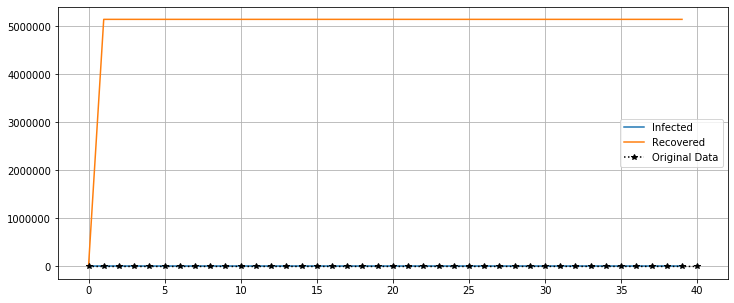

In [57]:
plot_epidemie(solution_korea_optimal, korea_df.loc[2:]['infected'])


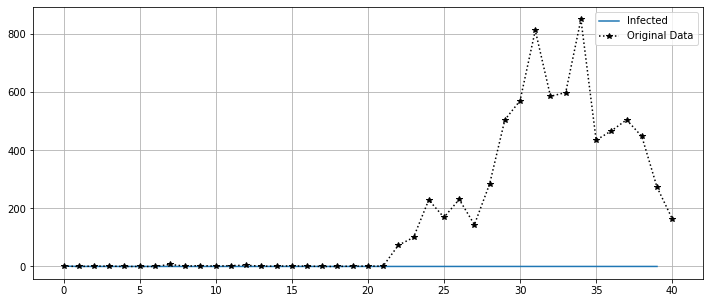

In [58]:
fig = plt.figure(figsize=(12, 5))
plt.plot(solution_korea_optimal.t, solution_korea_optimal.y[1])
plt.plot(korea_df.loc[2:]['infected'].reset_index(drop=True).index, korea_df.loc[2:]['infected'], "k*:")
plt.grid("True")
plt.legend(["Infected", "Original Data"])
plt.show()

In [59]:
china_df = epidemie_df.get_country('Mainland China')[:49]
china_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
44,Mainland China,2020-03-06,79771.0,3029.0,53172.0
45,Mainland China,2020-03-07,78619.0,3051.0,53511.0
46,Mainland China,2020-03-08,79455.0,3084.0,56114.0
47,Mainland China,2020-03-09,76902.0,3071.0,55004.0
48,Mainland China,2020-03-10,77201.0,3088.0,56620.0


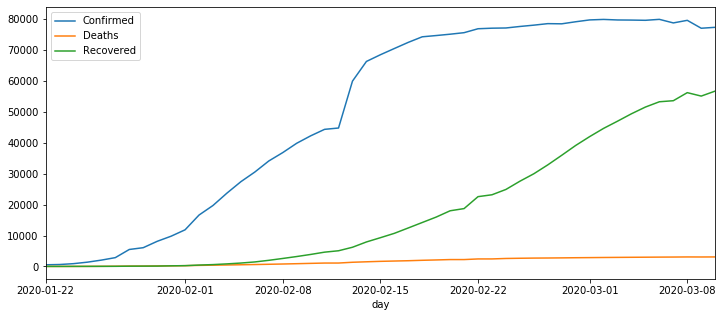

In [60]:
china_df.set_index('day').plot.line(figsize=(12, 5));


In [61]:
beta, gamma = [0.001, 0.1]
china_df['infected'] = china_df['Confirmed'].diff()
nb_steps = china_df.shape[0]
solution_china = solve_ivp(SIR, [0, nb_steps-1], [1_350_000_000, 1, 0], t_eval=np.arange(0, nb_steps, 1))

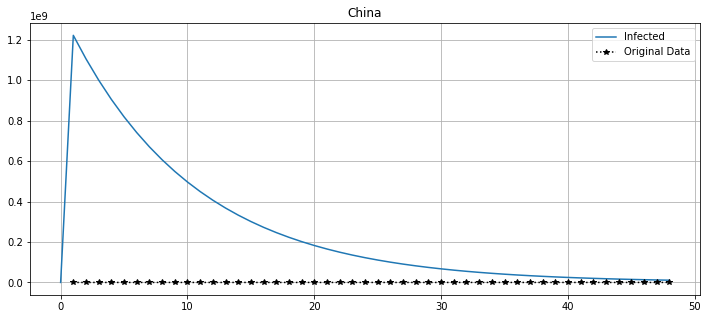

In [62]:
fig = plt.figure(figsize=(12, 5))
plt.plot(solution_china.t, solution_china.y[1])
plt.plot(china_df['infected'].reset_index(drop=True).index, china_df['infected'], "k*:")
plt.title('China')
plt.grid("True")
plt.legend(["Infected", "Original Data"])
plt.show()

In [63]:
korea_df.to_clipboard()
